# Classification II: Logistic Regression

**OBJECTIVES**:

- Differentiate between *Regression* and *Classification* problem settings
- Connect Least Squares methods to Classification through Logistic Regression
- Interpret coefficients of the model in terms of probabilities
- Discuss performance of classification model in terms of accuracy
- Understand the effect of an imbalanced target class on model performance

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

### Our Motivating Example



In [2]:
default = pd.read_csv('data/Default.csv', index_col = 0)

In [3]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [4]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


### Visualizing Default by Continuous Features

In [5]:
#scatterplot of balance vs. income colored by default status

In [6]:
#boxplots for balance and income by default


### Considering only `balance` as the predictor



In [7]:
#create binary default column


In [8]:
#scatter of Balance vs Default


##### PROBLEM

1. Build a `LinearRegression` model with balance as the predictor.
2. Interpret the $r^2$ score and $rmse$ for your regressor.
3. Predict the default for balances: `[500, 1000, 1500, 2000, 2500]`.  Do these make sense?

In [63]:
x_new = np.array([[500], [1000], [1500], [2000], [2500]]) #for predictions

### The Sigmoid aka Logistic Function


$$y = \frac{1}{1 + e^{-x}}$$

In [9]:
#define the logistic


In [10]:
#domain


In [11]:
#plot it


### Usage should seem familiar

Fit a `LogisticRegression` estimator from `sklearn` on the features:

```python 
X = default[['balance']]
y = default['binary_default']
```

In [12]:
#instantiate


In [13]:
#define X and y


In [14]:
#train test split


In [15]:
#fit on the train


In [16]:
#examine train and test scores


### Similarities to our earlier work

In [17]:
#there is a coefficient


In [18]:
#there is an intercept


### Where was the line?

The version of the logistic we have just developed is actually:

$$ y = \frac{e^{ax + b}}{1 + e^{ax + b}} $$

Its output represents probabilities of being labeled the positive class in our example.  This means that we can interpret the output of the above function using our parameters, remembering that we used the `balance` feature to predict `default`.

In [19]:
def predictor(x):
    line = clf.coef_[0]*x + clf.intercept_
    return np.e**line/(1 + np.e**line)

In [20]:
#predict 1000


In [21]:
#predict 2000


In [22]:
#estimator has this too


### Using Categorical Features

In [23]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


In [24]:
default['student_binary'] = np.where(default.student == 'No', 0, 1)

In [25]:
X = default['student_binary']

In [26]:
#instantiate and fit


In [27]:
#performance


In [28]:
#coefficients


In [29]:
#compare probabilities


### Using Multiple Features



In [30]:
default.columns

Index(['default', 'student', 'balance', 'income', 'student_binary'], dtype='object')

In [31]:
features = ['balance', 'income', 'student_binary']
X = default.loc[:, features]
y = default['binary_default']

KeyError: 'binary_default'

**Predictions**:

- student: yes
- balance: 1,500 dollars
- income: 40,000 dollars

- student: no
- balance: 1,500 dollars
- income: 40,000 dollars

### This is similar to our multicollinearity in regression; we will call it confounding

<center>
<img src = 'images/default_confound.png'/>
</center>

#### Using `scikitlearn` and its `Pipeline`

From the original data, to build a model involved:

1. One hot or dummy encoding the categorical feature.
2. Standard Scaling the continuous features
3. Building Logistic model

we can accomplish this all with the `Pipeline`, where the first step is a `make_column_transformer` and the second is a `LogisticRegression`.  

In [36]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [73]:
# create OneHotEncoder instance
ohe = OneHotEncoder(drop = 'first')

In [74]:
# create StandardScaler instance
sscaler = StandardScaler()

In [75]:
# make column transformer
transformer = make_column_transformer((ohe, ['student']), 
                                     remainder = sscaler)

In [76]:
# logistic regressor
clf = LogisticRegression()

In [77]:
# pipeline
pipe = Pipeline([('transform', transformer), ('model', clf)])

In [78]:
# fit it
pipe.fit(default[['student', 'income', 'balance']], default['default'])

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['student'])])),
                ('model', LogisticRegression())])

In [ ]:
# score on train and test
print(f'Train Score: {pipe.score(X_train, y_train)}')
print(f'Test Score: {pipe.score(X_test, y_test)}')

#### Compare to KNN and Grid Searching

Let's compare how this estimator performs compared to the `KNeighborsClassifier`.  This time however, we will be trying many KNN models across different numbers of neighbors.  One way we could do this is with a loop; something like:

```python
for neighbor in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
```



Instead, we can use the `GridSearchCV` object from sklearn.  This will take an estimator and a dictionary with parameters to be searched over.  

In [67]:
from sklearn.model_selection import GridSearchCV

In [64]:
# parameters we want to try
params = {'n_neighbors': range(1, 30, 2)}

In [66]:
# estimator with parameters
knn = KNeighborsClassifier()

In [68]:
# grid search object
grid = GridSearchCV(knn, param_grid=params)

In [69]:
# fit it


In [70]:
# what was best?


In [71]:
# score it 


#### Comparing Results

A good way to think about classifier performance is using a **confusion matrix**.  Below, we visualize this using the `ConfusionMatrixDisplay.from_estimator`. 

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

In [79]:
# a single confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['No', 'Yes'])

NameError: name 'X_test' is not defined

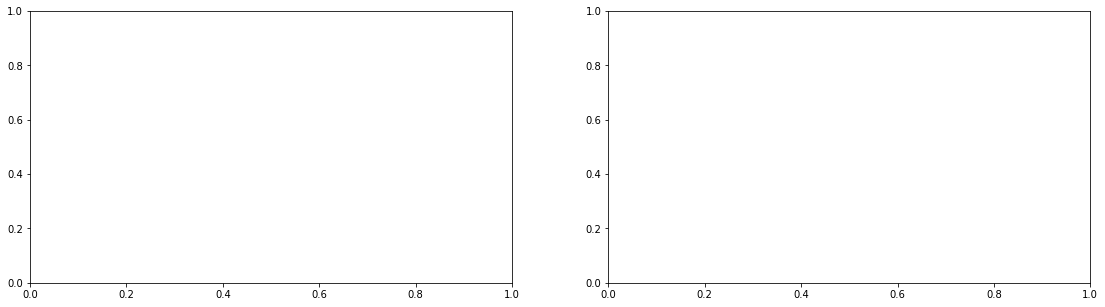

In [81]:
# compare knn and logistic
fig, ax = plt.subplots(1, 2, figsize = (19, 5))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['no', 'yes'], ax = ax[0])
ax[0].set_title('Logistic')
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels=['no', 'yes'], ax = ax[1])
ax[1].set_title('KNN')

#### Practice

In [82]:
from sklearn.datasets import load_breast_cancer

In [83]:
cancer = load_breast_cancer(as_frame=True).frame

In [84]:
cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [85]:
# use all features


In [ ]:
# train/test split


In [86]:
# pipeline to scale then knn


In [ ]:
# pipeline to scale then logistic


In [87]:
# fit knn


In [88]:
# fit logreg


In [89]:
# compare confusion matrices on test data
